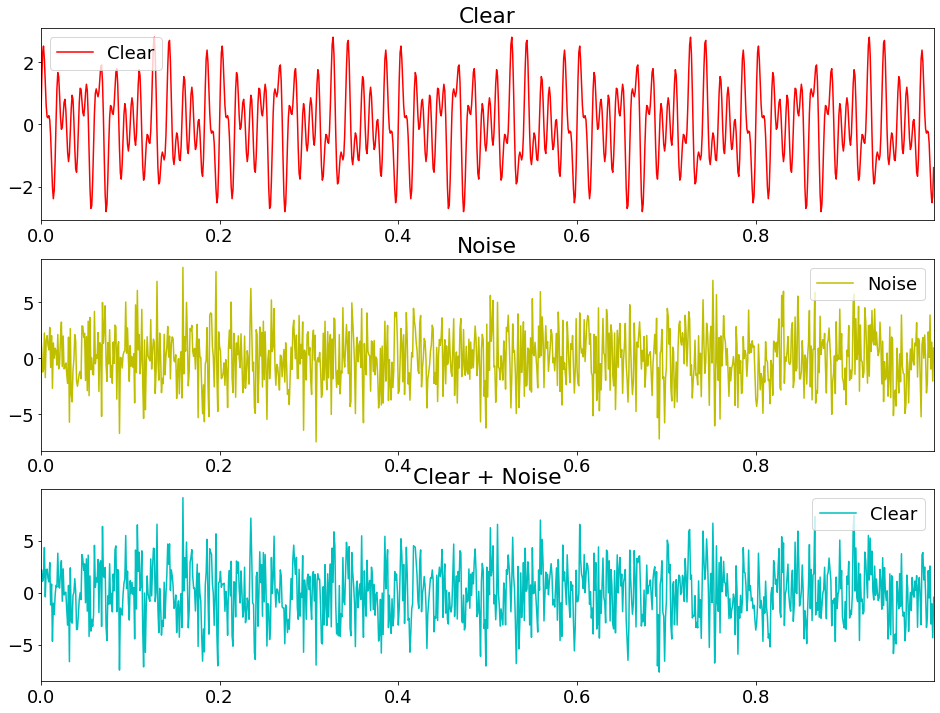

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi *50 *t  ) + np.sin(2*np.pi * 120 * t) + np.sin(2*np.pi * 65 * t)
f_clean = f
noise =  2.5* np.random.randn(len(t))
f = f + noise

fig,axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,f_clean,color='r')
plt.xlim(t[0],t[-1])
plt.title(label="Clear")
plt.legend(["Clear"])

plt.sca(axs[1])
plt.plot(t,noise,color='y')
plt.xlim(t[0],t[-1])
plt.title(label="Noise")
plt.legend(["Noise"])

plt.sca(axs[2])
plt.plot(t,f,color='c')
plt.xlim(t[0],t[-1])
plt.title(label="Clear + Noise")
plt.legend(["Clear","Noisy"])

c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


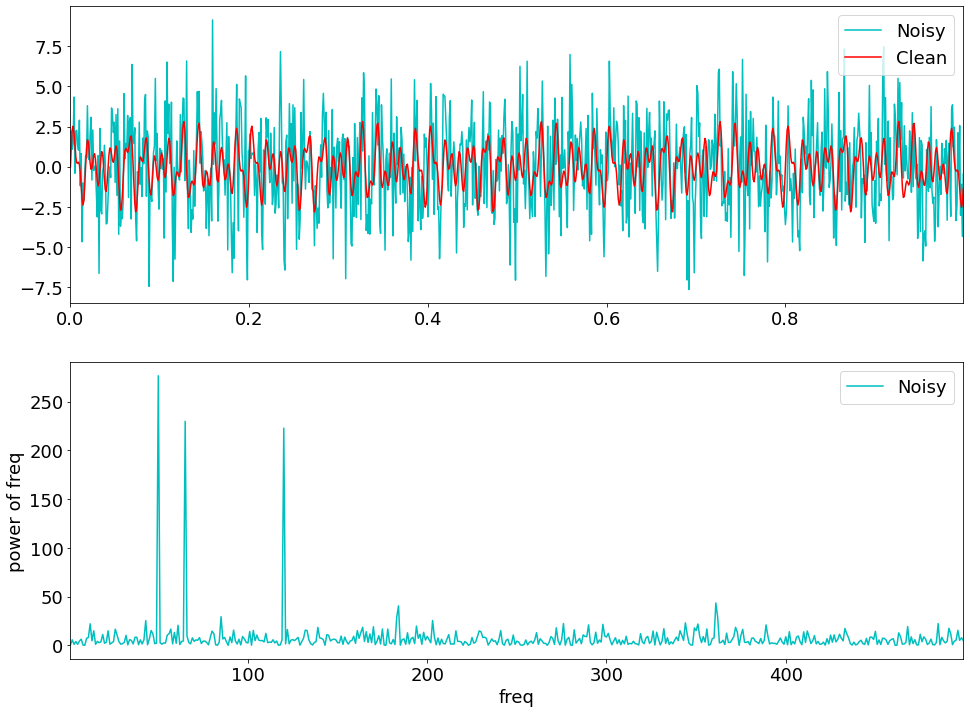

In [2]:
n = len(t)
fhat = np.fft.fft(f,n)
# print(fhat[0])
PSD = fhat * np.conj(fhat) / n
# print(np.conj(fhat)[0])
# print(PSD[0])
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')
# print(L)
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c')
plt.plot(t,f_clean,color='r')
plt.xlim(t[0],t[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L], PSD[L],color='c')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel(xlabel="freq")
plt.ylabel(ylabel="power of freq")
plt.legend(["Noisy"])



c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\+Code\Ai Quera\env_ai\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


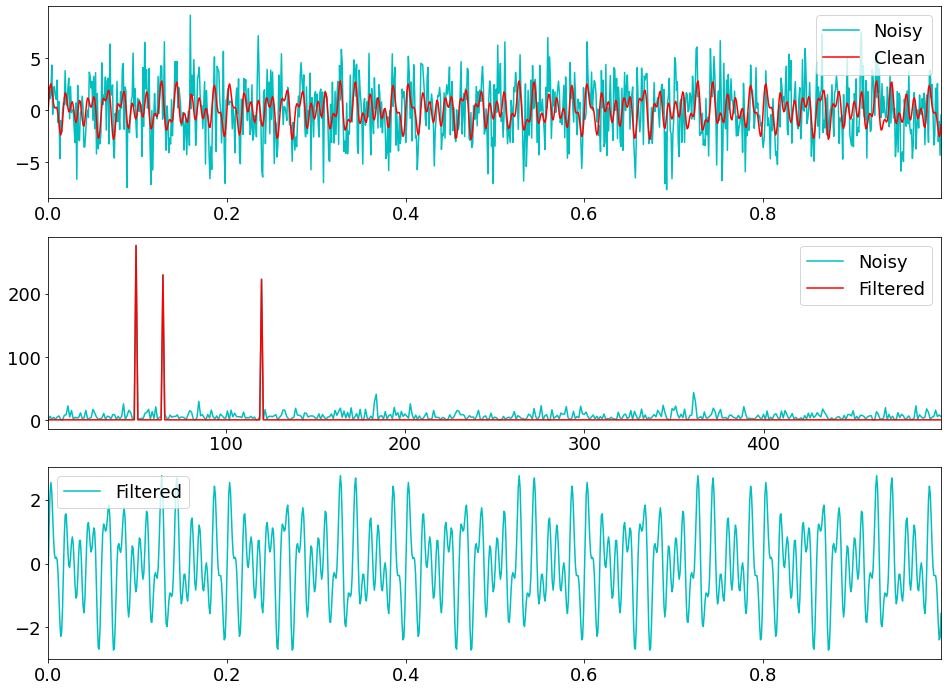

In [3]:
indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c')
plt.plot(t,f_clean,color='r')
plt.xlim(t[0],t[-1])
plt.legend(["Noisy","Clean"])

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c')
plt.plot(freq[L],PSDclean[L],color='r')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend(["Noisy","Filtered"])

plt.sca(axs[2])
plt.plot(t,ffilt,color='c')
plt.xlim(t[0],t[-1])
plt.legend(["Filtered"])
